# Exercise 04 - Due Friday, October 21 at 12pm

*Objectives*: Gain experience loading a CSV dataset into a database model you define yourself and using SQL to explore its contents. Explore the data by writing and executing a number of SQL queries using common syntax and functions and describing your findings.

*Grading criteria*: The tasks should all be completed, and questions should all be answered with SQL queries in the space provided, unless a text answer is requested. Results should be correct, according to the embedded tests. The notebook itself should be completely reproducible; from start to finish, another person should be able to use the same code to obtain the same results as yours.  Note that you will receive no more than partial credit if you do not add text/markdown cells explaining your thinking at each major step in each problem.

*Deadline*: Friday, October 21, 12pm. Submit your notebook to Blackboard and push it to your GitHub repository.

## Setup - obtain data and create database

The US City Open Data Census has data on [restaurant inspections from all over the country](http://us-city.census.okfn.org/dataset/food-safety).  Let's take a look at data from Albuquerque.  *Note*: metadata and other details for this dataset are available at http://data.cabq.gov/business/foodinspections/.

Fyi, to save you a step, I've converted this file into a clean CSV file by using the `dos2unix` command to change its line endings and to switch it to use commas instead of tabs using `csvformat -t inputfile.csv > outputfile.csv`.

First we download the dataset:

In [1]:
!wget https://raw.githubusercontent.com/gwsb-istm-6212-fall-2016/syllabus-and-schedule/master/exercises/abq-food-inspections-fy2010.csv

--2016-10-24 14:43:08--  https://raw.githubusercontent.com/gwsb-istm-6212-fall-2016/syllabus-and-schedule/master/exercises/abq-food-inspections-fy2010.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.32.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.32.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5025226 (4.8M) [text/plain]
Saving to: ‘abq-food-inspections-fy2010.csv’

abq-food-inspection 100%[=====================>]   4.79M  --.-KB/s   in 0.1s   

2016-10-24 14:43:09 (40.2 MB/s) - ‘abq-food-inspections-fy2010.csv’ saved [5025226/5025226]



## Problem 1 - examine the data (35 points)

Use `csvstat` and other tools as you see fit and observe its contents.  Review the metadata definitions linked to above.  Describe what you see:  What do all the columns mean?  Are there null values?  Which columns interest you the most?  Which columns present some complications or questions you would like to ask?

Insert a combination of code and text/markdown cells here to review the data and describe what you find.

First, taking a count of number of records in the file using wc -l option:

In [ ]:
!wc -l abq-food-inspections-fy2010.csv

Next, taking a look at the column headings using csvcut:

In [3]:
!csvcut -n abq-food-inspections-fy2010.csv

  1: FACILITY_NAME
  2: FACILITY_KEY
  3: SITE_ADDRESS
  4: CITY
  5: STATE
  6: ZIP
  7: OWNER_KEY
  8: OWNER_NAME
  9: NATURE_OF_BUSINESS
 10: STREET_NUMBER
 11: STREET_NAME
 12: STREET_TYPE
 13: POST_DIRECTIONAL
 14: PHONE
 15: PROGRAM_CATEGORY
 16: PROGRAM_CATEGORY_DESCRIPTION
 17: INSPECTION_DATE
 18: INSPECTION_TYPE
 19: INSPECTION_DESC
 20: SERIAL_NUM
 21: ACTION_CODE
 22: ACTION_DESC
 23: RESULT_CODE
 24: RESULT_DESC
 25: VIOLATION_CODE
 26: VIOLATION_DESC
 27: INSPECTION_MEMO


Looking at column statistics using csvstat:

In [4]:
!csvstat abq-food-inspections-fy2010.csv

  1. FACILITY_NAME
	<class 'str'>
	Nulls: False
	Unique values: 2615
	5 most frequent values:
		SMITHS FOOD AND DRUG CENTERS INC:	154
		ISOTOPES PARK - OVATIONS:	93
		PER EHSII CECELIA GARCIA OOB LA REYNA DEL SUR:	85
		ISLETA AMPHITHEATER:	68
		ECHO INC:	68
	Max length: 77
  2. FACILITY_KEY
	<class 'int'>
	Nulls: False
	Min: 13
	Max: 101482
	Sum: 820405773
	Mean: 46730.79135338346
	Median: 50866.0
	Standard Deviation: 32659.794578837962
	Unique values: 2835
	5 most frequent values:
		46323:	93
		65863:	85
		32817:	68
		80949:	68
		91825:	66
  3. SITE_ADDRESS
	<class 'str'>
	Nulls: True
	Unique values: 2456
	5 most frequent values:
		1601 AVENIDA CESAR CHAVEZ SE:	94
		644 OLD COORS BLVD SW:	85
		8601 CENTRAL AV NE:	77
		2200 SUNPORT BLVD SE:	75
		5210 CENTRAL AV SE:	73
	Max length: 35
  4. CITY
	<class 'str'>
	Nulls: False
	Values: ALBUQUERQUE
  5. STATE
	<class 'str'>
	Nulls: False
	Values: 87, NM
  6. ZIP
	<class 'str'>
	Nulls: False
	Unique values: 48
	5 most frequent values:
		87110

Looking at the csvstat results above (and also the metadata description file provided), we understand that the file contains data about food inspections carried out at facilities in the city of Albuquerque in New Mexico. 
There are 17556 rows in the dataset. 
There are 27 columns that give information about the name/address/owner/type of the facility inspected, the nature of inspection conducted (say, routine inspection, emergency response, etc.), the description of action taken (say, 'approved', 'annual sticker issued', etc.) after the inspection, descriptions of the result of the inspections, and violations if any

## Problem 2 - define a database model and load the data (35 points)

Based on what you found above, create and connect to a new database, define a database table in it, and load this dataset into it.  You may use either of the methods for this step you have seen in earlier class notebooks.  You may choose to eliminate variables/columns if they are not relevant or interesting to you - explain your reasoning if you do.  Either way, you should load a majority of the columns present in the source dataset into the database and all of its rows.

Once your data has loaded successfully, run a `COUNT(*)` query to verify that all the data has loaded correctly.

Insert a combination of code and text/markdown cells here to connect to your database, define your table, load its data, and verify the loaded records.

Restarting Postgresql:

In [5]:
!echo 'redspot' | sudo -S service postgresql restart

[sudo] password for jovyan: Restarting PostgreSQL 9.5 database server: main.


Creating a new database named exercise04:

In [6]:
!createdb -U dbuser exercise04

Loading the SQL extension:

In [7]:
%load_ext sql

/opt/conda/lib/python3.5/site-packages/IPython/config.py:13: ShimWarning: The `IPython.config` package has been deprecated. You should import from traitlets.config instead.
  "You should import from traitlets.config instead.", ShimWarning)
/opt/conda/lib/python3.5/site-packages/IPython/utils/traitlets.py:5: UserWarning: IPython.utils.traitlets has moved to a top-level traitlets package.
  warn("IPython.utils.traitlets has moved to a top-level traitlets package.")


Connecting to the newly created database:

In [8]:
%sql postgresql://dbuser@localhost:5432/exercise04

'Connected: dbuser@exercise04'

Defining a new table named 'inspection' in the database:

In [9]:
%%sql
DROP TABLE IF EXISTS insp;
CREATE TABLE inspection(
    FACILITY_NAME CHAR(202),
    FACILITY_KEY CHAR(20),
    SITE_ADDRESS CHAR(102),
    CITY CHAR(52),
    STATE CHAR(6),                                                        
    ZIP CHAR(22),
    OWNER_KEY CHAR(26),                                    
    OWNER_NAME CHAR(202), 
    NATURE_OF_BUSINESS CHAR(25),
    STREET_NUMBER CHAR(16),
    STREET_NAME CHAR(52),
    STREET_TYPE CHAR(10),
    POST_DIRECTIONAL CHAR(6),
    PHONE CHAR(42),
    PROGRAM_CATEGORY CHAR(10),
    PROGRAM_CATEGORY_DESCRIPTION CHAR(92),
    INSPECTION_DATE DATE,
    INSPECTION_TYPE CHAR(4),
    INSPECTION_DESC CHAR(102),
    SERIAL_NUM CHAR(20),
    ACTION_CODE CHAR(6),
    ACTION_DESC CHAR(102),
    RESULT_CODE CHAR(6),
    RESULT_DESC CHAR(102),
    VIOLATION_CODE CHAR(14),             
    VIOLATION_DESC CHAR(202),
    INSPECTION_MEMO CHAR(502)
)

Done.
Done.


[]

Inserting records into the newly created database by copying over records from the originally downloaded csv file:

In [10]:
%%sql
COPY inspection FROM '/home/jovyan/work/abq-food-inspections-fy2010.csv'
CSV
HEADER
QUOTE '"'
DELIMITER ',';

17556 rows affected.


[]

Taking a count of records in the table to ensure that the copy worked successfully.

In [11]:
%%sql
SELECT COUNT(*) FROM inspection;

1 rows affected.


count
17556


The count shows us that the 17556 detail records have been successfully populated into the table.

## Problem 3 - explore your data (30 points)

Now that the data is loaded, ask some questions of it!  Identify key variables of interest and note their ranges along with other useful descriptive statistics.  Choose and define a few lines of inquiry, execute queries for each, and describe what you find in your result sets.  Use any query techniques we've seen in class, including aggregate functions, transformations, subqueries, or others as appropriate. 

If you find interesting patterns, adding plots to your exploration would be useful.

Insert a combination of code and text/markdown cells here to explore your data.

From a food safety perspective, I believe it would be useful to analyse which regions in the city have the most restaurants that recieved a positive 'action' after the inspection.
First, looking at the possible 'action' outcomes:

In [14]:
%%sql
SELECT DISTINCT ACTION_DESC
FROM inspection

8 rows affected.


action_desc
UNSATISFACTORY
NON-GRADED
ANNUAL STICKER NOT ISSUED
FACILITY CLOSED AT TIME OF SERVICE
NO PERMIT APPLICATION ISSUED
FOOD PERMIT SUSPENSION
APPROVED
ANNUAL STICKER ISSUED


The actions of interest are 'Approved' and 'Annual sticker issued'.
Next looking at regions in the city with most inspections carried out:

In [17]:
%%sql
SELECT   post_directional,COUNT(*)
FROM     inspection
GROUP BY post_directional
ORDER BY COUNT(*) DESC

6 rows affected.


post_directional,count
NE,8669
NW,4138
SE,3205
SW,1368
None,167
N,9


In [21]:
%matplotlib inline

/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [22]:
%%sql
SELECT   post_directional,COUNT(*)
FROM     inspection
WHERE ACTION_DESC IN ('APPROVED','ANNUAL STICKER ISSUED')
GROUP BY post_directional
ORDER BY COUNT(*) DESC

6 rows affected.


post_directional,count
NE,7115
NW,3428
SE,2720
SW,1069
None,122
N,8


<Container object of 6 artists>

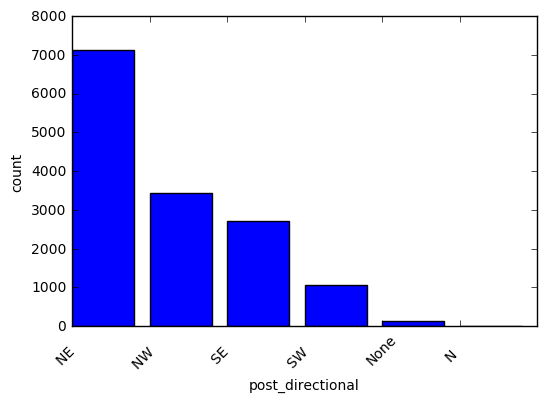

In [23]:
result = _
result.bar()

The above plot tells us about the regions in Albuquerque that have the most fcailities that got a positive 'result' from inspections.

Taking a look at top descriptions for Violations:

In [19]:
%%sql
SELECT   violation_desc,COUNT(*)
FROM     inspection
GROUP BY violation_desc
ORDER BY COUNT(*) DESC
LIMIT 12

12 rows affected.


violation_desc,count
Additional Comments,6353
No Violations Found,3434
Delivered Informational Brochure,1657
None,1009
Plumbing: Improperly installed/maintained/supplied,492
Non-Food contact surfaces,446
Improper sanitizing,434
Food unprotected,425
"Floors, Walls, Ceilings",406
Food contact surfaces,251


From the above we find that, the top 5 specific descriptions for violations are 'Plumbing: Improperly installed/maintained/supplied', 'Non-Food contact surfaces', 'Improper sanitizing', 'Food unprotected' & 'Floors, Walls, Ceilings'. These would be areas that facilities would need to be most watchful about.

## Bonus (10 points)

We have seen a few simple techniques for normalizing data in class.  Choose a column or set of columns that might be redundant and normalize them out to another table:

* Identify the columns to normalize in the source data table
* Create one or more new tables to hold the normalized records
* Extract data into the new tables
* Re-insert the new foreign key references from the new table into the source table